In [1]:
import csv
import numpy as np
import pandas as pd
import math

In [2]:
# d = previous state distance to target
# b = previous state bearing to target
# d_meas = new measurement of distance to target
# b_meas = new measurement of bearing to target

def kalman_update(d, b, d_meas, d_bear):
    K = 0.5
    d_prime = K * d + (1-K) * d_meas
    b_prime = K * b + (1-K) * d_bear
    return (d_prime, b_prime)

In [3]:
# d = previous state distance to target
# b = previous state bearing to target
# m = amount moved forward

def kalman_predict(d, b, m):
    d_prime = law_of_cosines_b(d, m, b)
    b_prime = math.pi - law_of_cosines_A(d, d_prime, m)
    return d_prime, b_prime

In [4]:
# Capital letter B is an angle. Small a, b and c are edges. 
# a is the edge across from A (I think that covers it.)
def law_of_cosines_B(a, b, c):
    return math.acos((b**2 - a**2 - c**2)/(-2.0 * a * c))

In [5]:
# Capital letter B is an angle. Small a, b and c are edges. 
# a is the edge across from A (I think that covers it.)
def law_of_cosines_b(a, c, B):
    return(math.sqrt(a**2 + c**2 - 2*a*c*math.cos(B)))

In [6]:
# Capital letter A is an angle. Small a, b and c are edges. 
# a is the edge across from A (I think that covers it.)
def law_of_cosines_A(a, b, c):
    if c == 0:
        c = 0.01
    if b == 0:
        b = 0.01
    return math.acos((-(a*a) + b*b + c*c) / (2 * b * c))

In [7]:
kalman_predict(0.67, 0.05, 102)

(101.33084285847629, 3.141262191086124)

In [8]:
# elapsed,g_forward_cmd,g_turn_cmd,g_shortest_bearing,g_shortest
df=pd.read_csv('moving.csv', sep=',')

In [9]:
state_dist = 1
state_bear = math.radians(45)
for index, row in df.iterrows():
    meas_dist = row['g_shortest']
    meas_bear = math.radians(row['g_shortest_bearing'])
    control_motion = row['g_forward_cmd'] * row['elapsed']
    temp_state_dist, temp_state_bear = kalman_predict(state_dist, state_bear, control_motion)
    pure_state_dist, pure_state_bear = kalman_predict(meas_dist, meas_bear, control_motion)
    state_dist, state_bear = kalman_update(temp_state_dist, temp_state_bear, meas_dist, meas_bear)
    df.loc[df.index[index], 'm'] = control_motion    
    df.loc[df.index[index], 'meas_dist'] = meas_dist
    df.loc[df.index[index], 'pure_state_dist'] = pure_state_dist    
    df.loc[df.index[index], 'temp_state_dist'] = temp_state_dist
    df.loc[df.index[index], 'state_dist'] = state_dist
    df.loc[df.index[index], 'meas_bear'] = math.degrees(meas_bear)
    df.loc[df.index[index], 'pure_state_bear'] = math.degrees(pure_state_bear)
    df.loc[df.index[index], 'state_bear'] = math.degrees(state_bear)
    df.loc[df.index[index], 'temp_state_bear'] = math.degrees(temp_state_bear)

In [10]:
# def kalman_predict(d, b, m):
d, b = kalman_predict(0.672, math.radians(45), 0)
print(math.degrees(b))

90.42631181682933


In [11]:
df

,elapsed,g_forward_cmd,g_turn_cmd,g_shortest_bearing,g_shortest,m,meas_dist,pure_state_dist,temp_state_dist,state_dist,meas_bear,pure_state_bear,state_bear,temp_state_bear
0,0.000,0.00,0.0,258.0,0.672,0.00000,0.672,0.672000,1.000000,0.836000,258.0,90.426312,174.143240,90.286480
1,0.200,0.00,0.0,258.0,0.674,0.00000,0.674,0.674000,0.836000,0.755000,258.0,90.425047,174.171340,90.342680
2,0.200,0.00,0.0,268.0,0.679,0.00000,0.679,0.679000,0.755000,0.717000,268.0,90.421917,179.189723,90.379445
3,0.202,0.00,0.0,257.0,0.677,0.00000,0.677,0.677000,0.717000,0.697000,257.0,90.423163,173.699778,90.399555
4,0.198,0.00,0.0,259.0,0.672,0.00000,0.672,0.672000,0.697000,0.684500,259.0,90.426312,174.705510,90.411021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.202,0.22,0.0,220.0,1.213,0.04444,1.213,1.247370,1.241638,1.227319,220.0,141.312220,193.177758,166.355515
74,0.197,0.22,0.0,218.0,1.257,0.04334,1.257,1.291428,1.269556,1.263278,218.0,143.183898,192.634076,167.268152
75,0.208,0.22,0.0,217.0,1.284,0.04576,1.284,1.320833,1.307968,1.295984,217.0,144.194690,192.402182,167.804365
76,0.192,0.22,0.0,217.0,1.333,0.04224,1.333,1.366971,1.337269,1.335135,217.0,144.065554,192.493257,167.986513


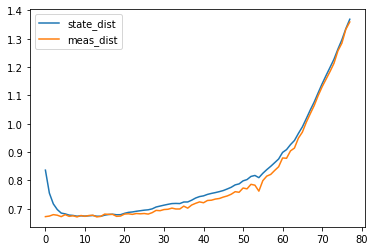

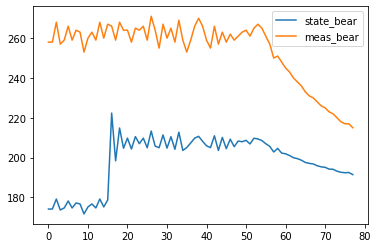

In [13]:
df.plot(y=['state_dist', 'meas_dist'])
df.plot(y=['state_bear', 'meas_bear'])

